In [45]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, TerminateOnNaN
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [46]:


train = pd.read_csv(r"H:\Sem-7\CS5691\Assignment-3\Datasets\Dataset3\train.csv")
test  = pd.read_csv(r"H:\Sem-7\CS5691\Assignment-3\Datasets\Dataset3\test.csv")

x_train = train[["x1", "x2"]].to_numpy(dtype=np.float32)
y_train = train["label"].to_numpy(dtype=np.int32)
x_test  = test[["x1", "x2"]].to_numpy(dtype=np.float32)
y_test  = test["label"].to_numpy(dtype=np.int32)



In [47]:
num_classes = len(np.unique(y_train))
y_train_oh = to_categorical(y_train, num_classes)
y_test_oh  = to_categorical(y_test, num_classes)

model = Sequential([
    Dense(12, activation="tanh", input_shape=(x_train.shape[1],)),
    Dense(8, activation="tanh"),
    Dense(num_classes, activation="softmax")
])

sgd = SGD(learning_rate=0.07, momentum=0.9)
model.compile(optimizer=sgd, loss="binary_crossentropy", metrics=["accuracy"])

es = EarlyStopping(monitor="loss", min_delta=1e-3, patience=3, restore_best_weights=True)

history = model.fit(
    x_train, y_train_oh,
    batch_size=4,
    epochs=100,
    shuffle=True,
    # callbacks=[es],
    verbose=1
)


Epoch 1/100


c:\Users\hrush\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6981 - loss: 0.6113
Epoch 2/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7159 - loss: 0.5951
Epoch 3/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7275 - loss: 0.5764
Epoch 4/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7373 - loss: 0.5956
Epoch 5/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7311 - loss: 0.6086
Epoch 6/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7124 - loss: 0.6007
Epoch 7/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7053 - loss: 0.6048
Epoch 8/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7053 - loss: 0.6060
Epoch 9/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6714 - loss: 0.6282
Epoch 10/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7106 - loss: 0.5938
Epoch 11/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6910 - loss: 0.6107
Epoch 12/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

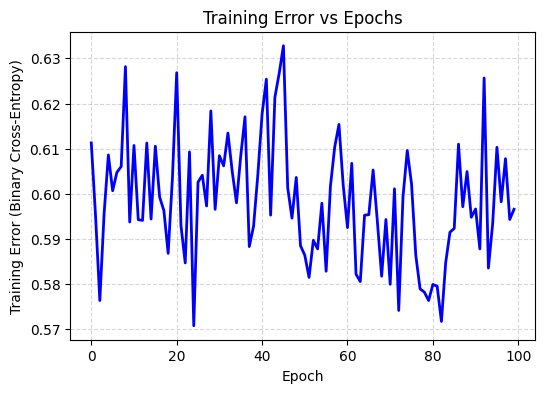

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], color='blue', linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Training Error (Binary Cross-Entropy)")
plt.title("Training Error vs Epochs")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


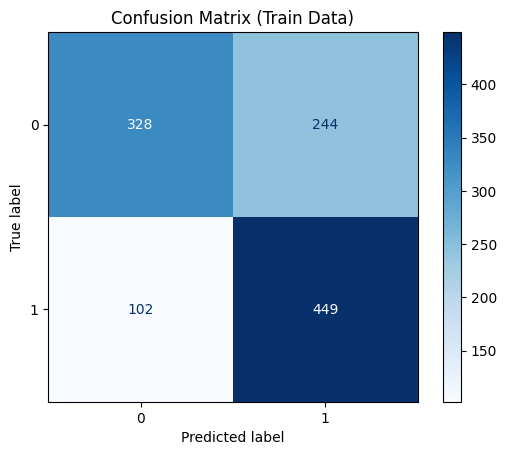

In [49]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_probs = model.predict(x_train, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=True)
plt.title("Confusion Matrix (Train Data)")
plt.show()


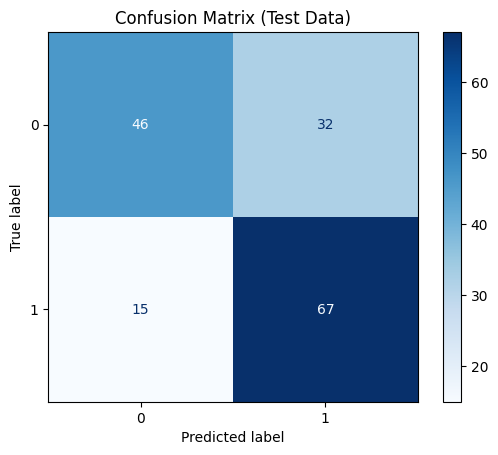

In [50]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=True)
plt.title("Confusion Matrix (Test Data)")
plt.show()


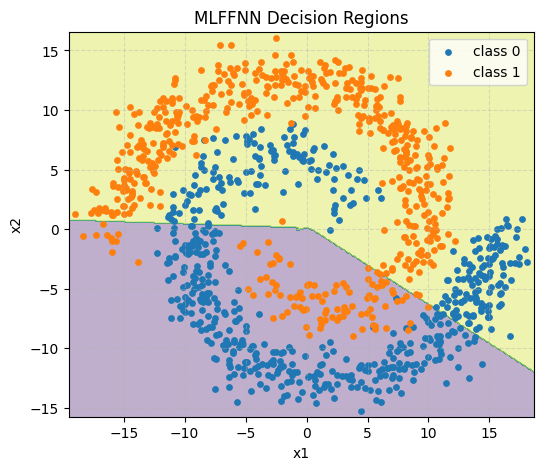

In [51]:
import numpy as np
import matplotlib.pyplot as plt

X = x_train.to_numpy(dtype=np.float32) if hasattr(x_train, "to_numpy") else np.asarray(x_train, dtype=np.float32)
y = y_train.to_numpy(dtype=np.int32).ravel() if hasattr(y_train, "to_numpy") else np.asarray(y_train, dtype=np.int32).ravel()

x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)
grid = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)

probs = model.predict(grid, verbose=0)
if probs.shape[1] == 1:
    Z = (probs.ravel() >= 0.5).astype(int)
else:
    Z = np.argmax(probs, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.35)

classes = np.unique(y)
for cls in classes:
    pts = X[y == cls]
    plt.scatter(pts[:,0], pts[:,1], s=15, label=f"class {cls}")

plt.title("MLFFNN Decision Regions")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="best")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


In [52]:
# Evaluate on the training set
train_loss, train_accuracy = model.evaluate(x_train, y_train_oh, verbose=0)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_oh, verbose=0)

# Print results
print(f"Train Loss: {train_loss:.4f}")
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Train Loss: 0.6018
Train Accuracy: 69.19%
Test Loss: 0.6290
Test Accuracy: 70.63%


x_train shape: (1123, 2)
y_train_oh shape: (1123, 2)
Epoch 1/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.6687 - loss: 0.6783
Epoch 2/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6607 - loss: 0.7185
Epoch 3/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6714 - loss: 0.7519
Epoch 4/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6545 - loss: 0.7493
Epoch 5/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6447 - loss: 0.7559
Epoch 6/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6349 - loss: 0.8097
Epoch 7/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6679 - loss: 0.7317
Epoch 8/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6456 - loss: 0.7701
Epoch 9/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6545 - loss: 0.7940
Epoch 10/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6616 - loss: 0.8430
Epoch 11/100
281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6536 -

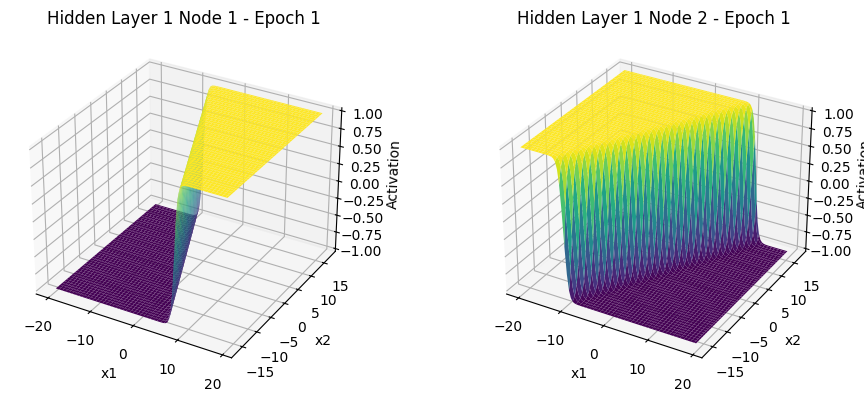

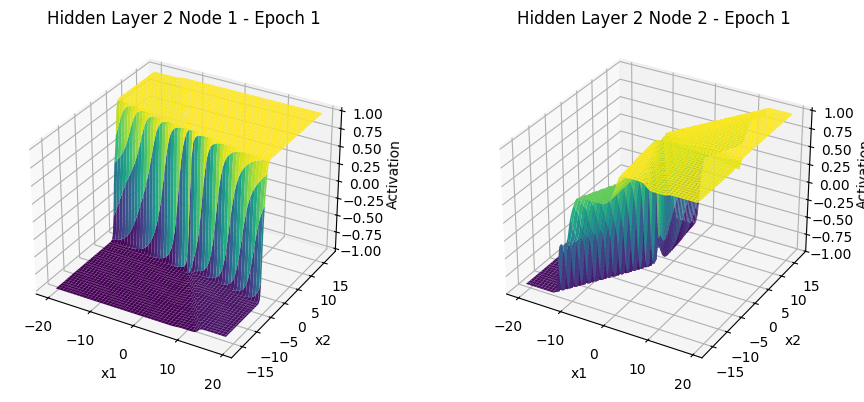

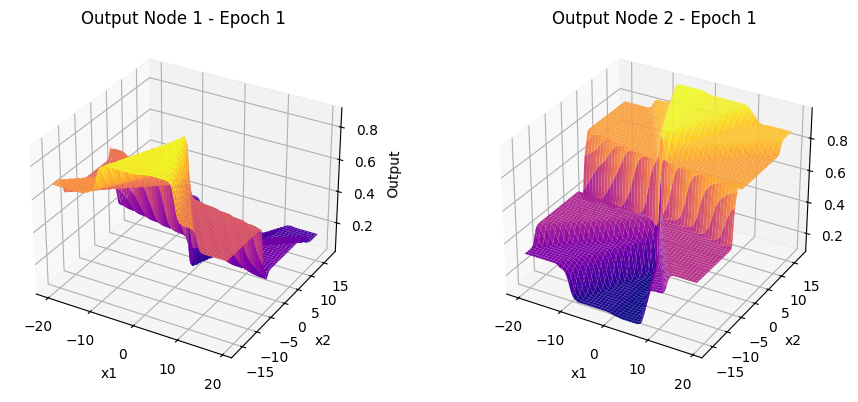


=== Epoch 10 ===


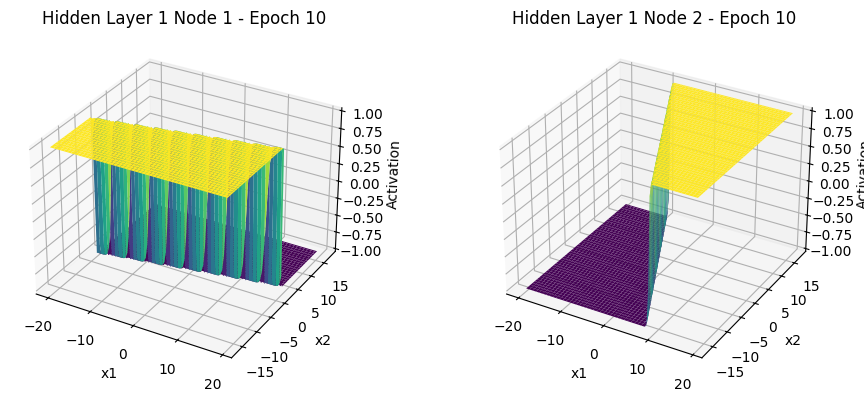

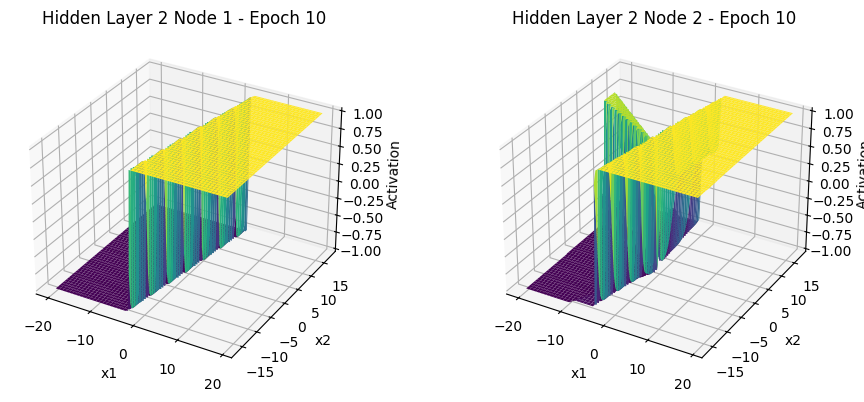

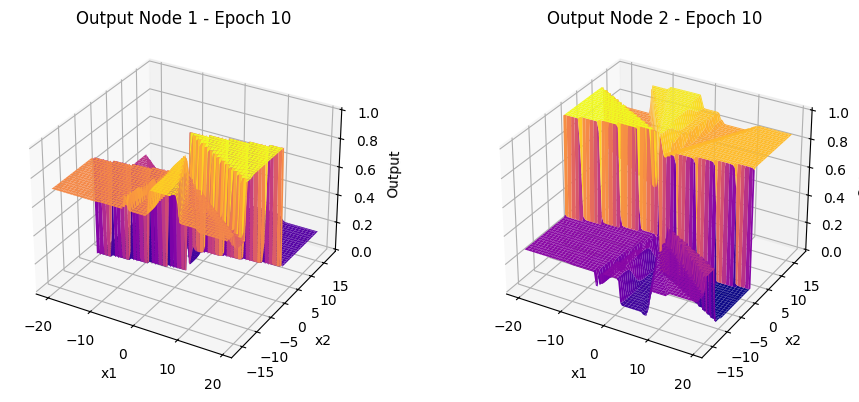


=== Epoch 50 ===


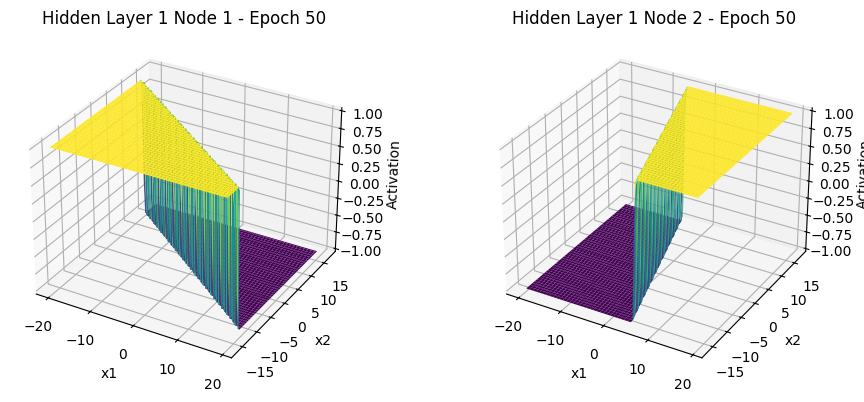

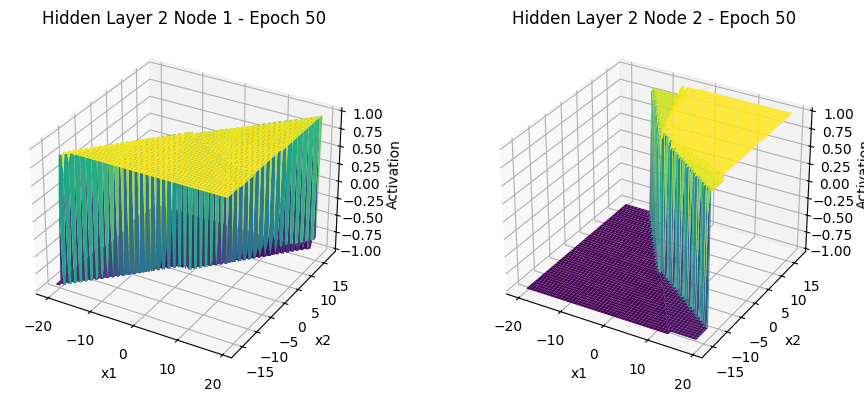

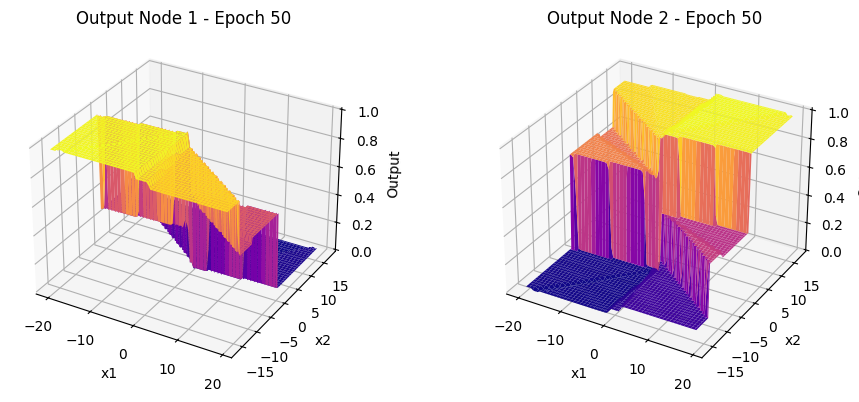


=== Final ===


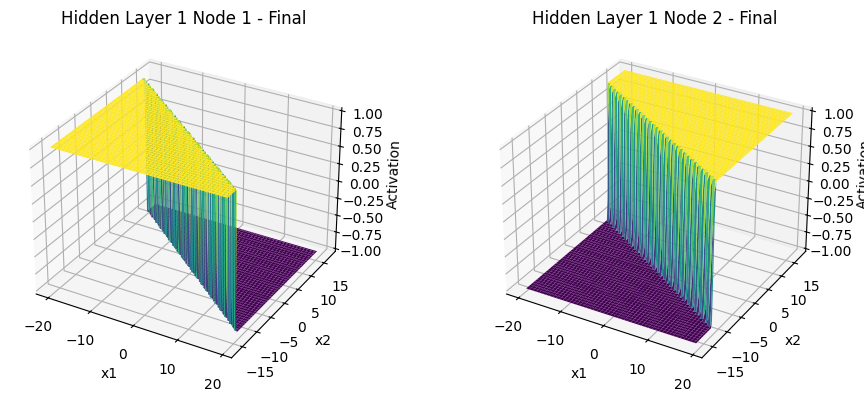

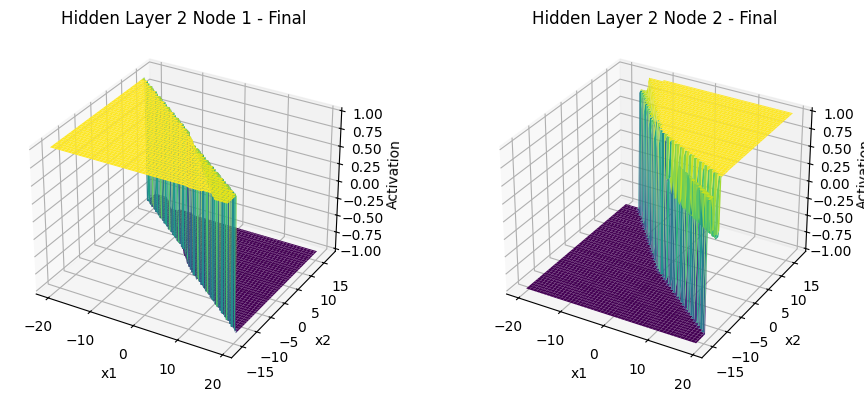

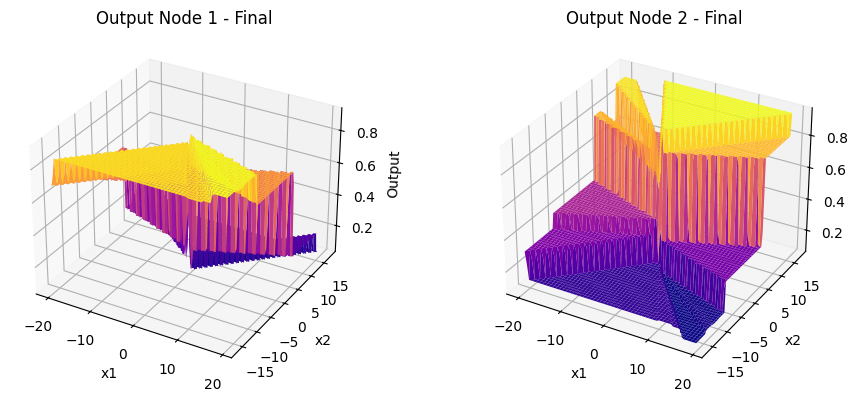

In [41]:
# ==== FINAL CELL: train once, snapshot activations, and plot surfaces ====
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.utils import to_categorical

# ----------------------------------------------------------------
# Encode y_train → one-hot
# ----------------------------------------------------------------
num_classes = len(np.unique(y_train))
y_train_oh = to_categorical(y_train, num_classes)

# ----------------------------------------------------------------
# Build model (Functional API so no input errors)
# ----------------------------------------------------------------
inputs = Input(shape=(x_train.shape[1],))
h1 = Dense(12, activation="tanh", name="hidden1")(inputs)
h2 = Dense(8, activation="tanh", name="hidden2")(h1)
outputs = Dense(num_classes, activation="softmax", name="output")(h2)
model = Model(inputs=inputs, outputs=outputs)

sgd = SGD(learning_rate=0.07, momentum=0.9)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

# ----------------------------------------------------------------
# Mesh grid for visualization (assuming 2D input)
# ----------------------------------------------------------------
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# ----------------------------------------------------------------
# Sub-models for activations
# ----------------------------------------------------------------
hidden1_model = Model(inputs=inputs, outputs=h1)
hidden2_model = Model(inputs=inputs, outputs=h2)
output_model  = Model(inputs=inputs, outputs=outputs)

# ----------------------------------------------------------------
# Callback to capture activations at given epochs
# ----------------------------------------------------------------
class CaptureActivations(Callback):
    def __init__(self, capture_epochs=(1, 10, 50)):
        super().__init__()
        self.capture_epochs = set(capture_epochs)
        self.data = {}

    def on_epoch_end(self, epoch, logs=None):
        ep = epoch + 1
        if ep in self.capture_epochs:
            self.data[f"Epoch {ep}"] = {
                "h1": hidden1_model.predict(grid, verbose=0),
                "h2": hidden2_model.predict(grid, verbose=0),
                "out": output_model.predict(grid, verbose=0)
            }

    def on_train_end(self, logs=None):
        self.data["Final"] = {
            "h1": hidden1_model.predict(grid, verbose=0),
            "h2": hidden2_model.predict(grid, verbose=0),
            "out": output_model.predict(grid, verbose=0)
        }

snapshots = CaptureActivations()

# ----------------------------------------------------------------
# Align x_train and y_train_oh if needed
# ----------------------------------------------------------------
min_len = min(len(x_train), len(y_train_oh))
x_train = x_train[:min_len]
y_train_oh = y_train_oh[:min_len]

# ----------------------------------------------------------------
# Train once (on all data)
# ----------------------------------------------------------------
print("x_train shape:", x_train.shape)
print("y_train_oh shape:", y_train_oh.shape)

history = model.fit(
    x_train, y_train_oh,
    epochs=100, batch_size=4, shuffle=True,
    callbacks=[snapshots],
    verbose=1
)

# ----------------------------------------------------------------
# Plot helpers
# ----------------------------------------------------------------
def plot_two_nodes(data, layer_name, label, nodes=(0, 1)):
    fig = plt.figure(figsize=(10, 4))
    for i, n in enumerate(nodes):
        ax = fig.add_subplot(1, 2, i + 1, projection='3d')
        ax.plot_surface(xx, yy, data[:, n].reshape(xx.shape),
                        cmap='viridis', edgecolor='none')
        ax.set_title(f"{layer_name} Node {n+1} - {label}")
        ax.set_xlabel("x1"); ax.set_ylabel("x2"); ax.set_zlabel("Activation")
    plt.tight_layout(); plt.show()

def plot_output(data, label):
    fig = plt.figure(figsize=(5 * data.shape[1], 4))
    for i in range(data.shape[1]):
        ax = fig.add_subplot(1, data.shape[1], i + 1, projection='3d')
        ax.plot_surface(xx, yy, data[:, i].reshape(xx.shape),
                        cmap='plasma', edgecolor='none')
        ax.set_title(f"Output Node {i+1} - {label}")
        ax.set_xlabel("x1"); ax.set_ylabel("x2"); ax.set_zlabel("Output")
    plt.tight_layout(); plt.show()

# ----------------------------------------------------------------
# Generate activation surface plots
# ----------------------------------------------------------------
for label, acts in snapshots.data.items():
    print(f"\n=== {label} ===")
    plot_two_nodes(acts["h1"], "Hidden Layer 1", label)
    plot_two_nodes(acts["h2"], "Hidden Layer 2", label)
    plot_output(acts["out"], label)
